In [1]:
import cairo
from IPython.display import Image, display
import math
from io import BytesIO
import numpy as np
import Shapes
from rgb_colors import colors

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 1000, 1000)
    context = cairo.Context(surface)
    matrix = cairo.Matrix(yy=-1, y0=surface.get_height())
    context.transform(matrix)
    draw_func(context, 1000, 1000)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=400))

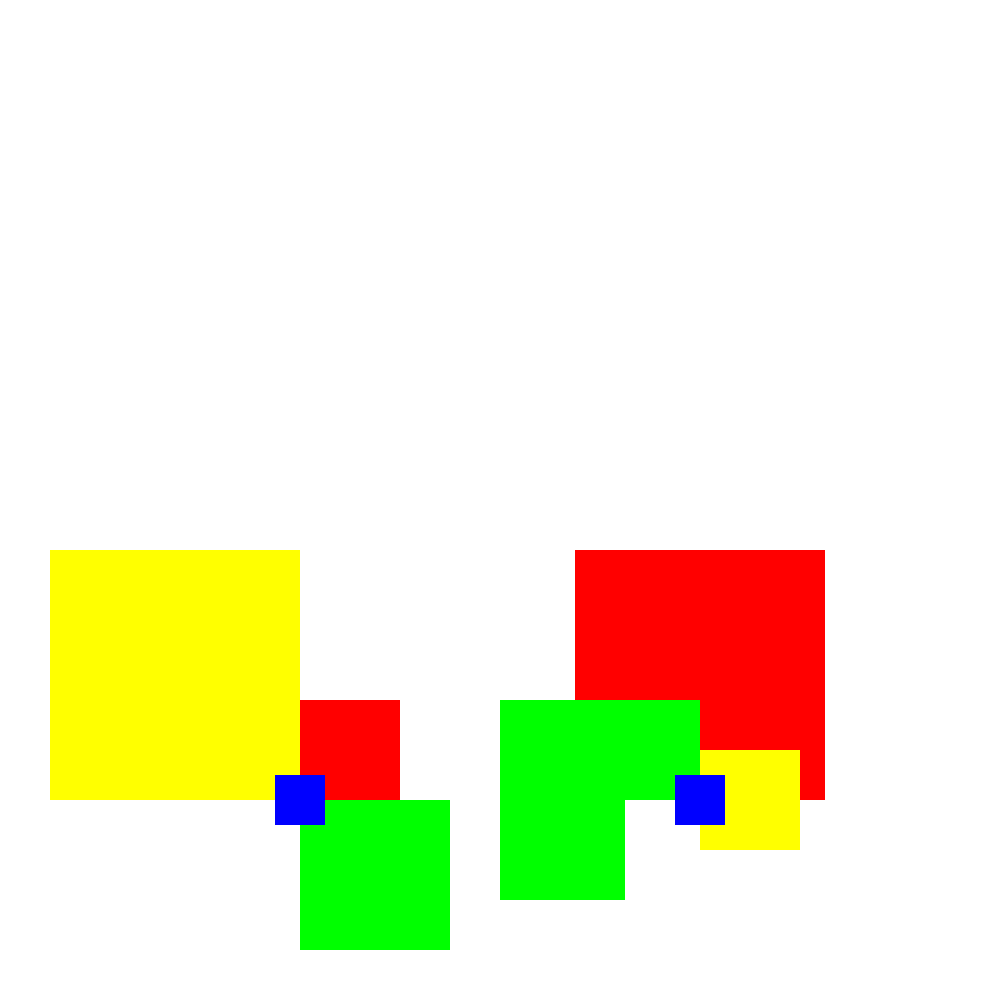

In [2]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    rect2 = Shapes.My_Rectangle(
        ref_pt="top_left", ref_pt_x=300, ref_pt_y=200, width=150, height=150
    )
    rect3 = Shapes.My_Rectangle(
        ref_pt="top_right", ref_pt_x=300, ref_pt_y=200, width=200, height=200
    )
    rect4 = Shapes.My_Rectangle(
        ref_pt="bot_right", ref_pt_x=300, ref_pt_y=200, width=250, height=250
    )
    rect5 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=300, ref_pt_y=200, width=50, height=50
    )

    rect1.draw_fill(context, *colors.red)
    rect2.draw_fill(context, *colors.green)
    rect3.draw_fill(context, *colors.white)
    rect4.draw_fill(context, *colors.yellow)
    rect5.draw_fill(context, *colors.blue)

    rect1 = Shapes.My_Rectangle(
        ref_pt="mid_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    rect2 = Shapes.My_Rectangle(
        ref_pt="mid_top", ref_pt_x=300, ref_pt_y=200, width=150, height=150
    )
    rect3 = Shapes.My_Rectangle(
        ref_pt="mid_right", ref_pt_x=300, ref_pt_y=200, width=200, height=200
    )
    rect4 = Shapes.My_Rectangle(
        ref_pt="mid_bot", ref_pt_x=300, ref_pt_y=200, width=250, height=250
    )

    rect1.translate(400, 0)
    rect2.translate(400, 0)
    rect3.translate(400, 0)
    rect4.translate(400, 0)
    rect5.translate(400, 0)

    rect4.draw_fill(context, *colors.red)
    rect3.draw_fill(context, *colors.green)
    rect2.draw_fill(context, *colors.white)
    rect1.draw_fill(context, *colors.yellow)
    rect5.draw_fill(context, *colors.blue)


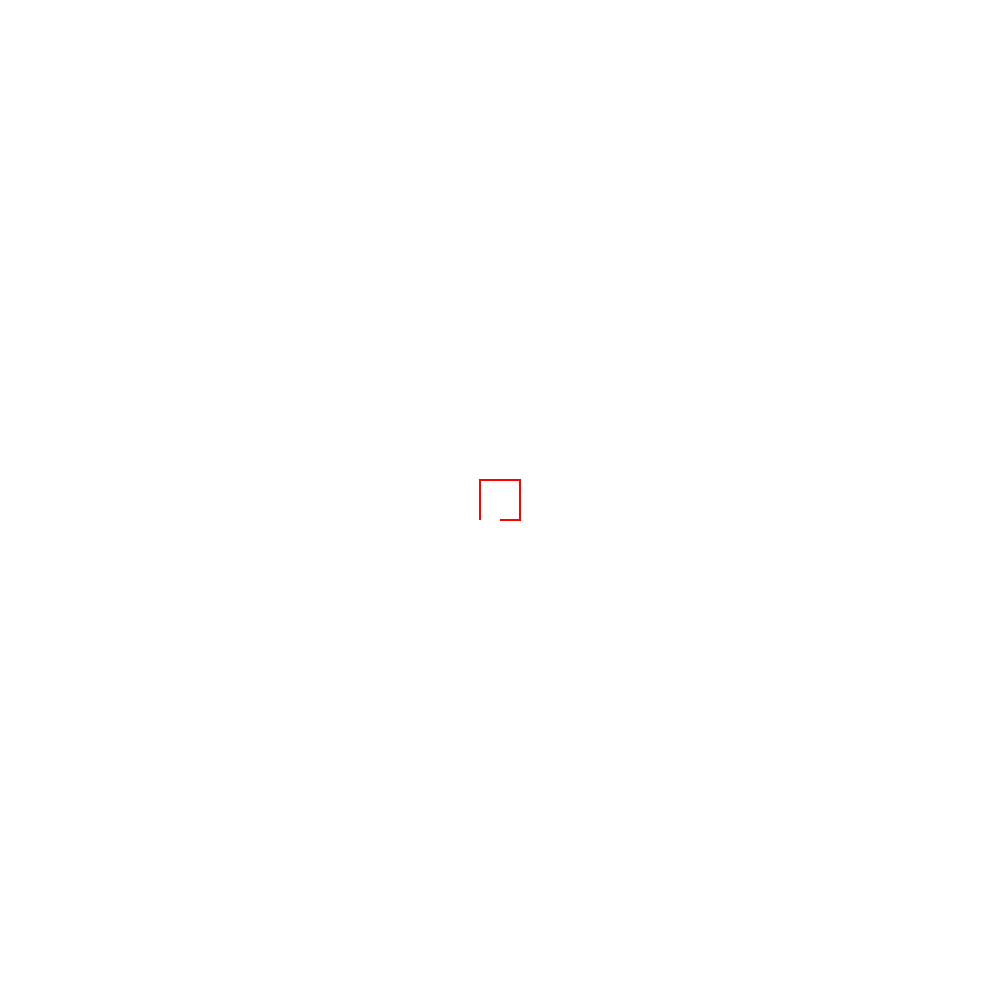

In [3]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=40, height=40
    )

    context.set_source_rgb(*colors.red)

    context.move_to(rect1.bbox_bot_left_x, rect1.bbox_bot_left_y)
    context.line_to(rect1.bbox_mid_left_x, rect1.bbox_mid_left_y)
    context.line_to(rect1.bbox_top_left_x, rect1.bbox_top_left_y)
    context.line_to(rect1.bbox_mid_top_x, rect1.bbox_mid_top_y)
    context.line_to(rect1.bbox_top_right_x, rect1.bbox_top_right_y)
    context.line_to(rect1.bbox_mid_right_x, rect1.bbox_mid_right_y)
    context.line_to(rect1.bbox_bot_right_x, rect1.bbox_bot_right_y)
    context.line_to(rect1.bbox_mid_bot_x, rect1.bbox_mid_bot_y)
    context.stroke()

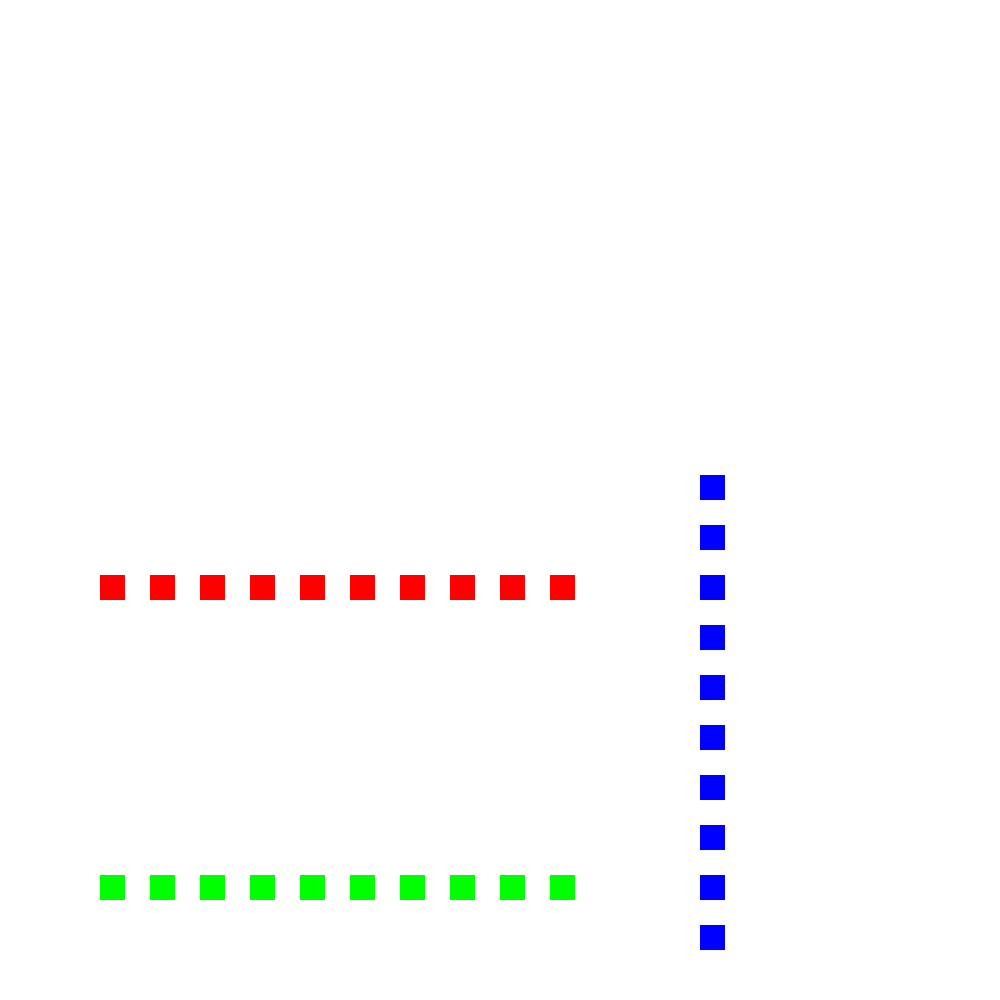

In [4]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=100, ref_pt_y=100, width=25, height=25
    )

    rect1.draw_fill(context, *colors.green)

    rect1.move_bbox_xy_to("bot_left", 150, 100)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("mid_left", 200, 112.5)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("top_left", 250, 125)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("mid_top", 312.5, 125)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("top_right", 375, 125)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("mid_right", 425, 112.5)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("bot_right", 475, 100)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("mid_bot", 512.5, 100)
    rect1.draw_fill(context, *colors.green)
    rect1.move_bbox_xy_to("center", 562.5, 112.5)
    rect1.draw_fill(context, *colors.green)

    rect2 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=100, ref_pt_y=400, width=25, height=25
    )

    rect2.draw_fill(context, *colors.red)

    rect2.move_bbox_x_to("bot_left", 150)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("mid_left", 200)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("top_left", 250)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("mid_top", 312.5)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("top_right", 375)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("mid_right", 425)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("bot_right", 475)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("mid_bot", 512.5)
    rect2.draw_fill(context, *colors.red)
    rect2.move_bbox_x_to("center", 562.5)
    rect2.draw_fill(context, *colors.red)

    rect3 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=700, ref_pt_y=50, width=25, height=25
    )

    rect3.draw_fill(context, *colors.blue)

    rect3.move_bbox_y_to("bot_left", 100)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("mid_left", 162.5)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("top_left", 225)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("mid_top", 275)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("top_right", 325)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("mid_right", 362.5)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("bot_right", 400)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("mid_bot", 450)
    rect3.draw_fill(context, *colors.blue)
    rect3.move_bbox_y_to("center", 512.5)
    rect3.draw_fill(context, *colors.blue)

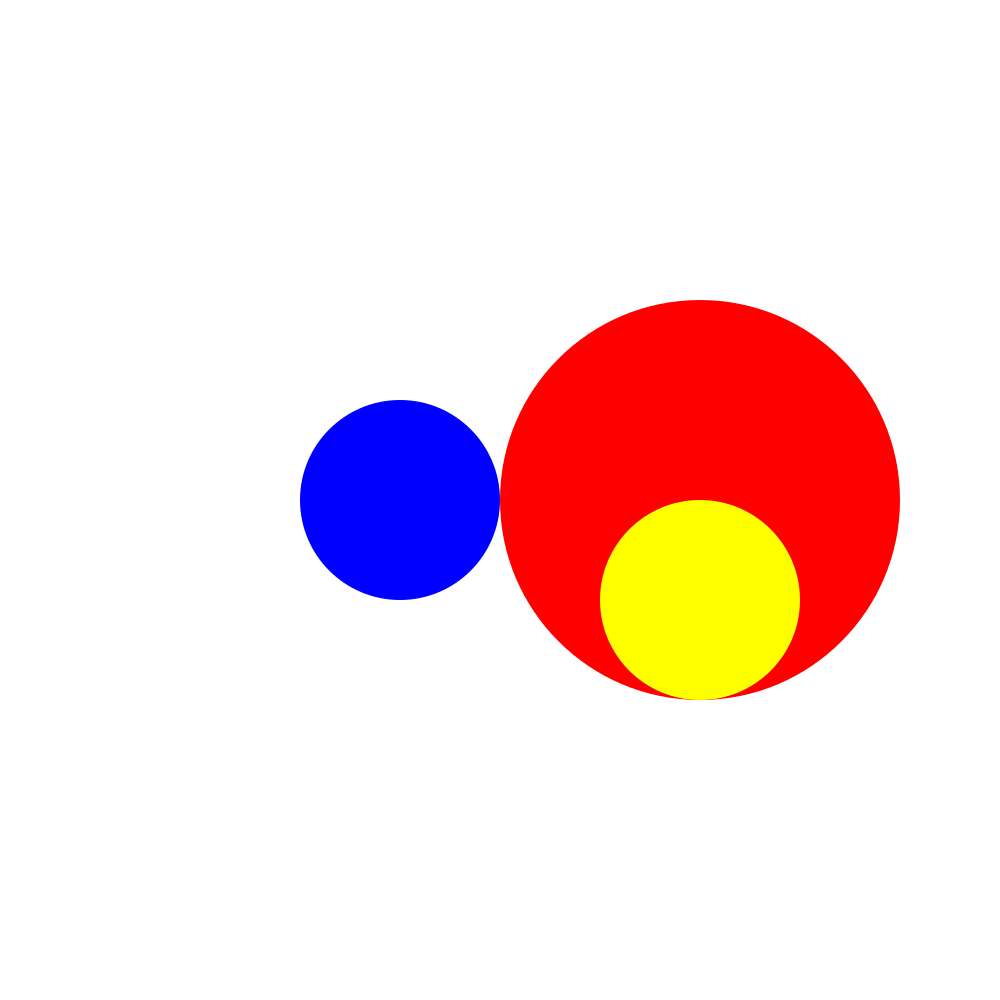

In [5]:
@disp
def draw(context, width, height):
    circ1 = Shapes.My_Circle(
        ref_pt="left", ref_pt_x=500, ref_pt_y=500, radius=200
    )
    circ2 = Shapes.My_Circle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, radius=100
    )
    circ3 = Shapes.My_Circle(
        ref_pt="top", ref_pt_x=500, ref_pt_y=500, radius=100
    )
    circ4 = Shapes.My_Circle(
        ref_pt="right", ref_pt_x=500, ref_pt_y=500, radius=100
    )

    circ3.translate(200, 0)

    circ1.draw_fill(context, *colors.red)
    # circ2.draw_fill(context, *colors.green)
    circ3.draw_fill(context, *colors.yellow)
    circ4.draw_fill(context, *colors.blue)

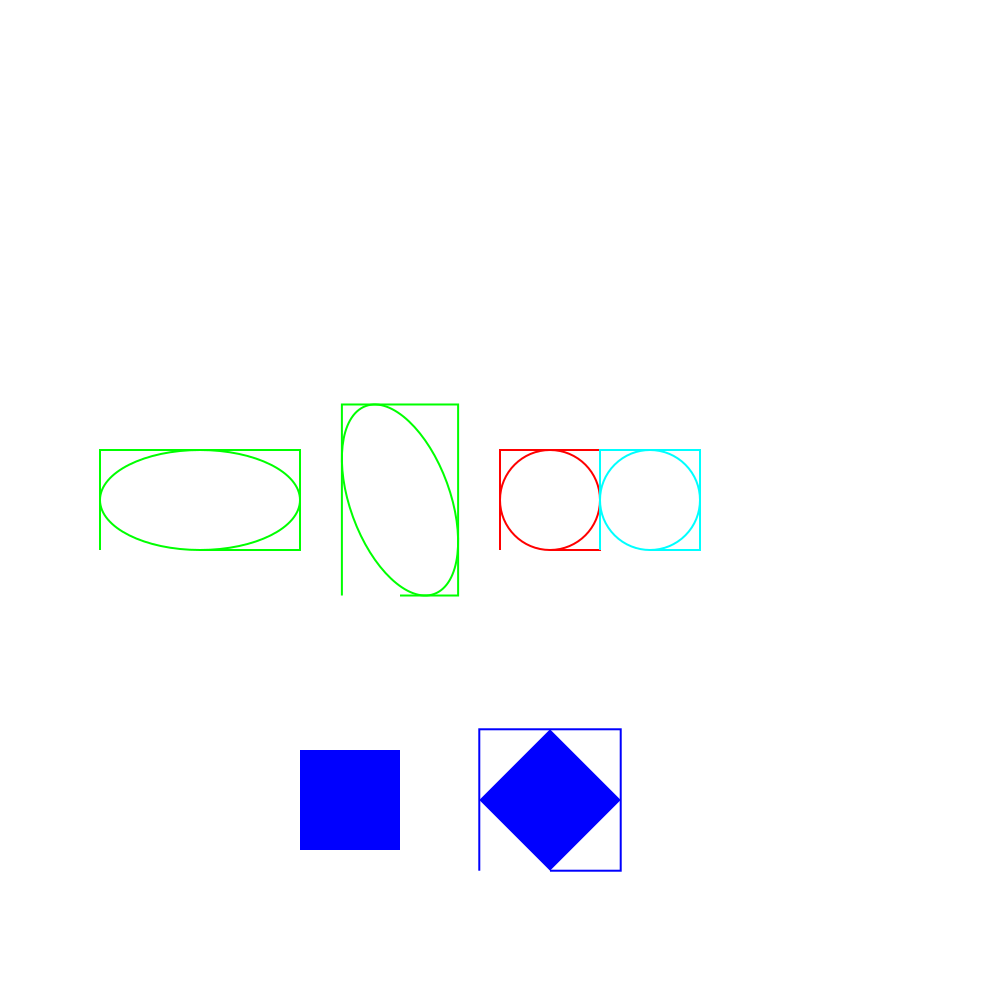

In [6]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="mid_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    circ1 = Shapes.My_Circle(
        ref_pt="left", ref_pt_x=500, ref_pt_y=500, radius=50
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=200, ref_pt_y=500, x_radius=100, y_radius=50
    )

    rect1.draw_fill(context, *colors.blue)
    rect1.translate(200, 0)
    rect1.rotate(45)
    rect1.draw_fill(context, *colors.blue)
    context.move_to(rect1.bbox_bot_left_x, rect1.bbox_bot_left_y)
    context.line_to(rect1.bbox_mid_left_x, rect1.bbox_mid_left_y)
    context.line_to(rect1.bbox_top_left_x, rect1.bbox_top_left_y)
    context.line_to(rect1.bbox_mid_top_x, rect1.bbox_mid_top_y)
    context.line_to(rect1.bbox_top_right_x, rect1.bbox_top_right_y)
    context.line_to(rect1.bbox_mid_right_x, rect1.bbox_mid_right_y)
    context.line_to(rect1.bbox_bot_right_x, rect1.bbox_bot_right_y)
    context.line_to(rect1.bbox_mid_bot_x, rect1.bbox_mid_bot_y)
    context.stroke()

    context.move_to(circ1.bbox_bot_left_x, circ1.bbox_bot_left_y)
    context.line_to(circ1.bbox_mid_left_x, circ1.bbox_mid_left_y)
    context.line_to(circ1.bbox_top_left_x, circ1.bbox_top_left_y)
    context.line_to(circ1.bbox_mid_top_x, circ1.bbox_mid_top_y)
    context.line_to(circ1.bbox_top_right_x, circ1.bbox_top_right_y)
    context.line_to(circ1.bbox_mid_right_x, circ1.bbox_mid_right_y)
    context.line_to(circ1.bbox_bot_right_x, circ1.bbox_bot_right_y)
    context.line_to(circ1.bbox_mid_bot_x, circ1.bbox_mid_bot_y)
    circ1.draw_stroke(context, *colors.red)
    circ1.translate(100, 0)
    circ1.rotate(135)
    circ1.draw_stroke(context, *colors.cyan)
    context.move_to(circ1.bbox_bot_left_x, circ1.bbox_bot_left_y)
    context.line_to(circ1.bbox_mid_left_x, circ1.bbox_mid_left_y)
    context.line_to(circ1.bbox_top_left_x, circ1.bbox_top_left_y)
    context.line_to(circ1.bbox_mid_top_x, circ1.bbox_mid_top_y)
    context.line_to(circ1.bbox_top_right_x, circ1.bbox_top_right_y)
    context.line_to(circ1.bbox_mid_right_x, circ1.bbox_mid_right_y)
    context.line_to(circ1.bbox_bot_right_x, circ1.bbox_bot_right_y)
    context.line_to(circ1.bbox_mid_bot_x, circ1.bbox_mid_bot_y)
    context.stroke()

    ellipse1.draw_stroke(context, *colors.green)
    context.move_to(ellipse1.bbox_bot_left_x, ellipse1.bbox_bot_left_y)
    context.line_to(ellipse1.bbox_mid_left_x, ellipse1.bbox_mid_left_y)
    context.line_to(ellipse1.bbox_top_left_x, ellipse1.bbox_top_left_y)
    context.line_to(ellipse1.bbox_mid_top_x, ellipse1.bbox_mid_top_y)
    context.line_to(ellipse1.bbox_top_right_x, ellipse1.bbox_top_right_y)
    context.line_to(ellipse1.bbox_mid_right_x, ellipse1.bbox_mid_right_y)
    context.line_to(ellipse1.bbox_bot_right_x, ellipse1.bbox_bot_right_y)
    context.line_to(ellipse1.bbox_mid_bot_x, ellipse1.bbox_mid_bot_y)
    context.stroke()
    ellipse1.translate(200, 0)
    ellipse1.rotate(110)
    ellipse1.draw_stroke(context, *colors.green)
    context.move_to(ellipse1.bbox_bot_left_x, ellipse1.bbox_bot_left_y)
    context.line_to(ellipse1.bbox_mid_left_x, ellipse1.bbox_mid_left_y)
    context.line_to(ellipse1.bbox_top_left_x, ellipse1.bbox_top_left_y)
    context.line_to(ellipse1.bbox_mid_top_x, ellipse1.bbox_mid_top_y)
    context.line_to(ellipse1.bbox_top_right_x, ellipse1.bbox_top_right_y)
    context.line_to(ellipse1.bbox_mid_right_x, ellipse1.bbox_mid_right_y)
    context.line_to(ellipse1.bbox_bot_right_x, ellipse1.bbox_bot_right_y)
    context.line_to(ellipse1.bbox_mid_bot_x, ellipse1.bbox_mid_bot_y)
    context.stroke()

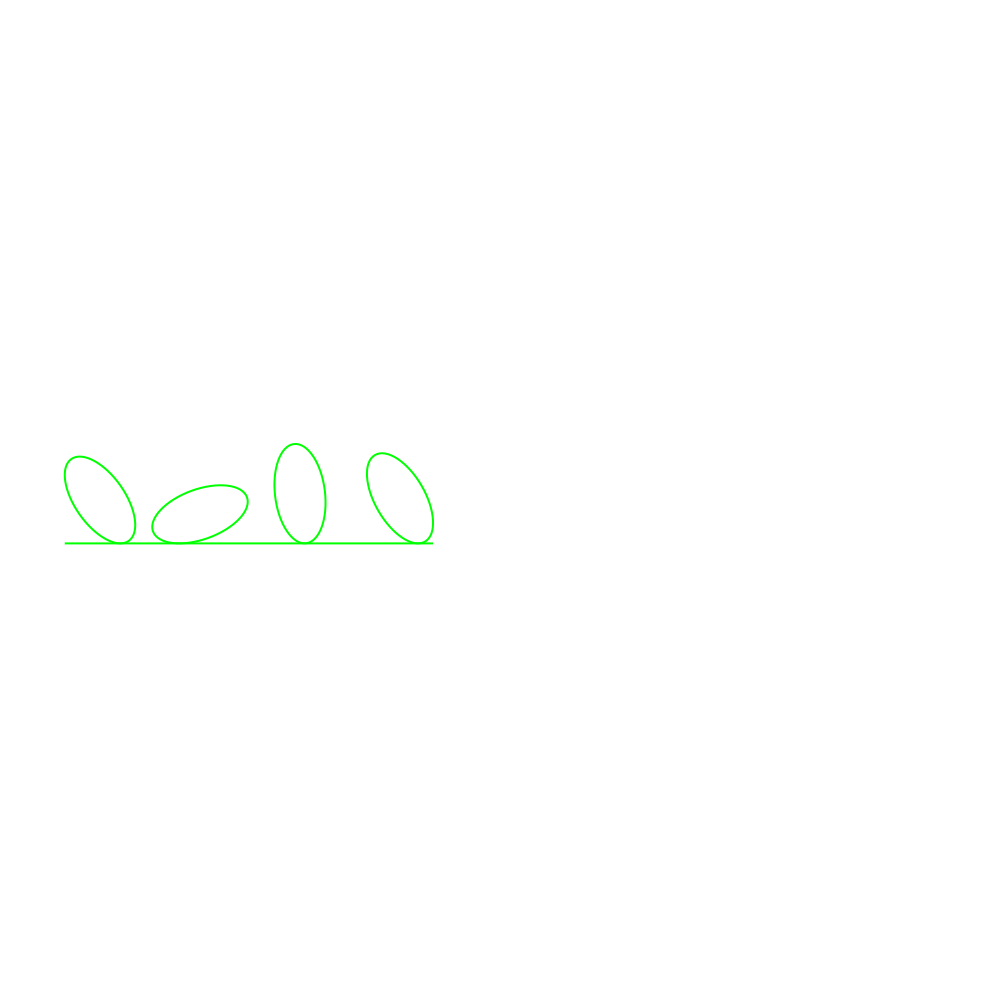

In [7]:
@disp
def draw(context, width, height):
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    ellipse2 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    
    ellipse1.rotate(35)
    ellipse1.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(110)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(77)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(23)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_stroke(context, *colors.green)
    context.move_to(ellipse1.bbox_bot_left_x, ellipse2.bbox_bot_left_y)
    context.line_to(ellipse2.bbox_bot_right_x, ellipse2.bbox_bot_right_y)
    context.stroke()

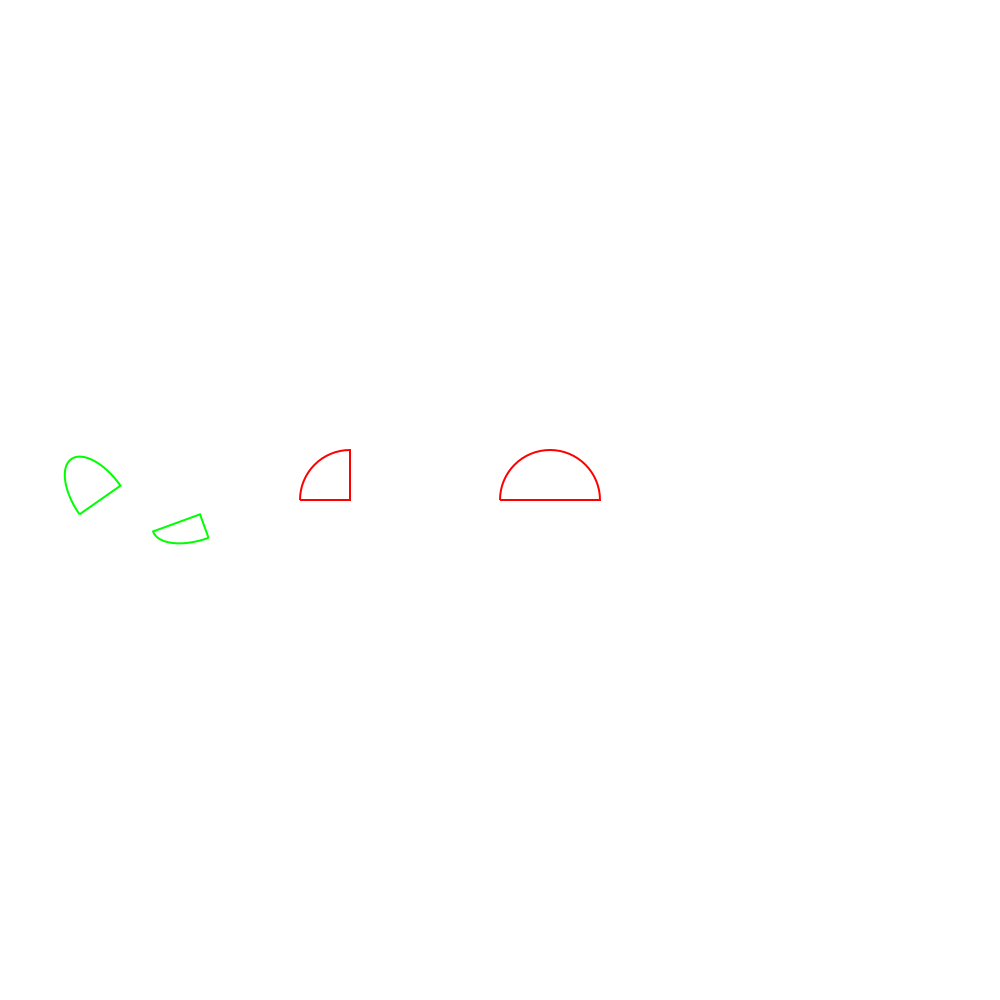

In [8]:
@disp
def draw(context, width, height):
    circ1 = Shapes.My_Circle(
        ref_pt="left", ref_pt_x=500, ref_pt_y=500, radius=50
    )
    ellipse1 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    ellipse2 = Shapes.My_Ellipse(
        ref_pt="center", ref_pt_x=100, ref_pt_y=500, x_radius=25, y_radius=50
    )
    

    circ1.draw_half_stroke(context, *colors.red)
    circ1.translate(-200, 0)
    circ1.draw_quarter_stroke(context, *colors.red)
    ellipse1.rotate(35)
    ellipse1.draw_half_stroke(context, *colors.green)
    ellipse2.translate(100, 0)
    ellipse2.rotate(110)
    ellipse2.move_bbox_y_to("mid_bot", ellipse1.bbox_bot_left_y)
    ellipse2.draw_quarter_stroke(context, *colors.green)

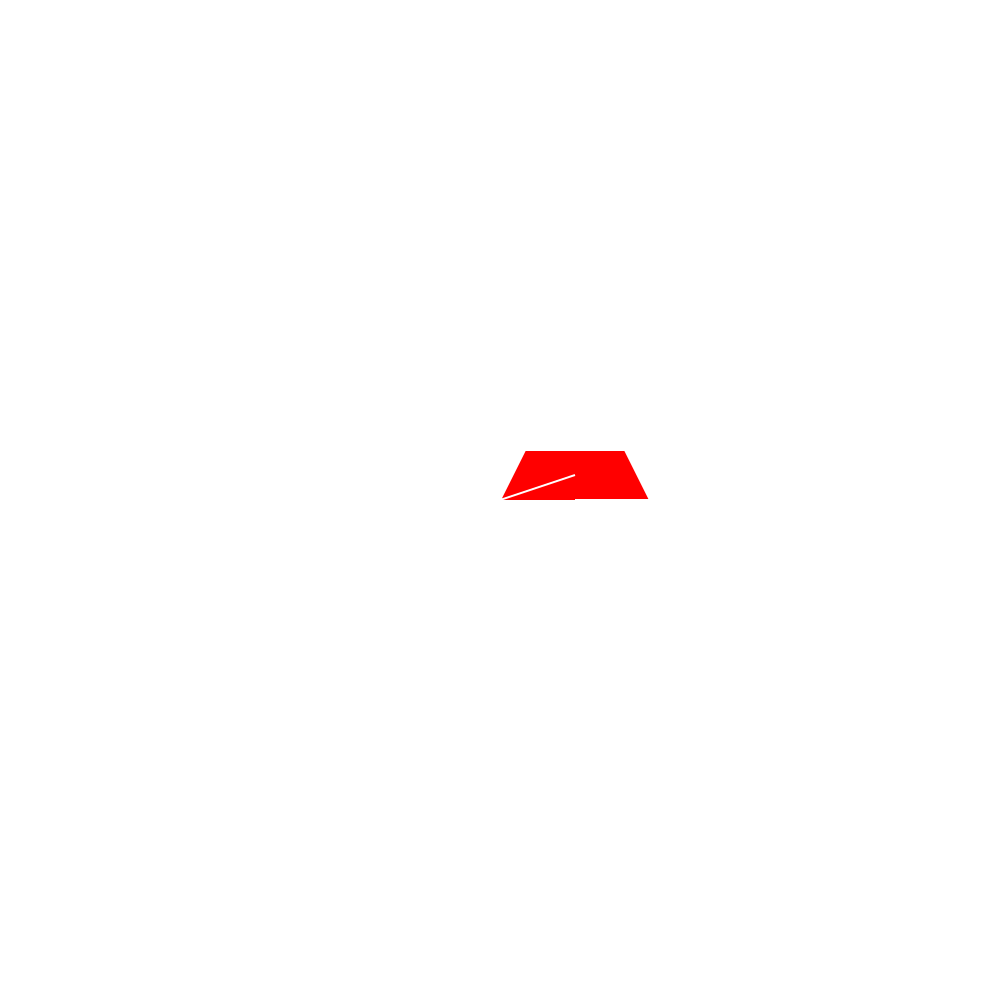

In [9]:
@disp
def draw(context, width, height):
    positions = []
    for position in ["center", "bot_left", "mid_left", "top_left", "mid_top", "top_right", "mid_right", "bot_right", "mid_bot"]:
        trap = Shapes.My_Trapezoid(
            ref_pt=position, ref_pt_x=500, ref_pt_y=500, bot_width=150, top_width=100, height=50
        )

        positions.append([trap._matrix.loc[dict(dim="x", pt="pt1")].values, trap._matrix.loc[dict(dim="y", pt="pt1")].values])
   
    trap = Shapes.My_Trapezoid(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, bot_width=150, top_width=100, height=50
        )
    trap.draw_fill(context, *colors.red)
    context.set_source_rgb(*colors.white)
    context.move_to(positions[0][0], positions[0][1])
    context.line_to(positions[1][0], positions[1][1])
    context.line_to(positions[2][0], positions[2][1])
    context.line_to(positions[3][0], positions[3][1])
    context.line_to(positions[4][0], positions[4][1])
    context.line_to(positions[5][0], positions[5][1])
    context.line_to(positions[6][0], positions[6][1])
    context.line_to(positions[7][0], positions[7][1])
    context.line_to(positions[8][0], positions[8][1])

    context.stroke()

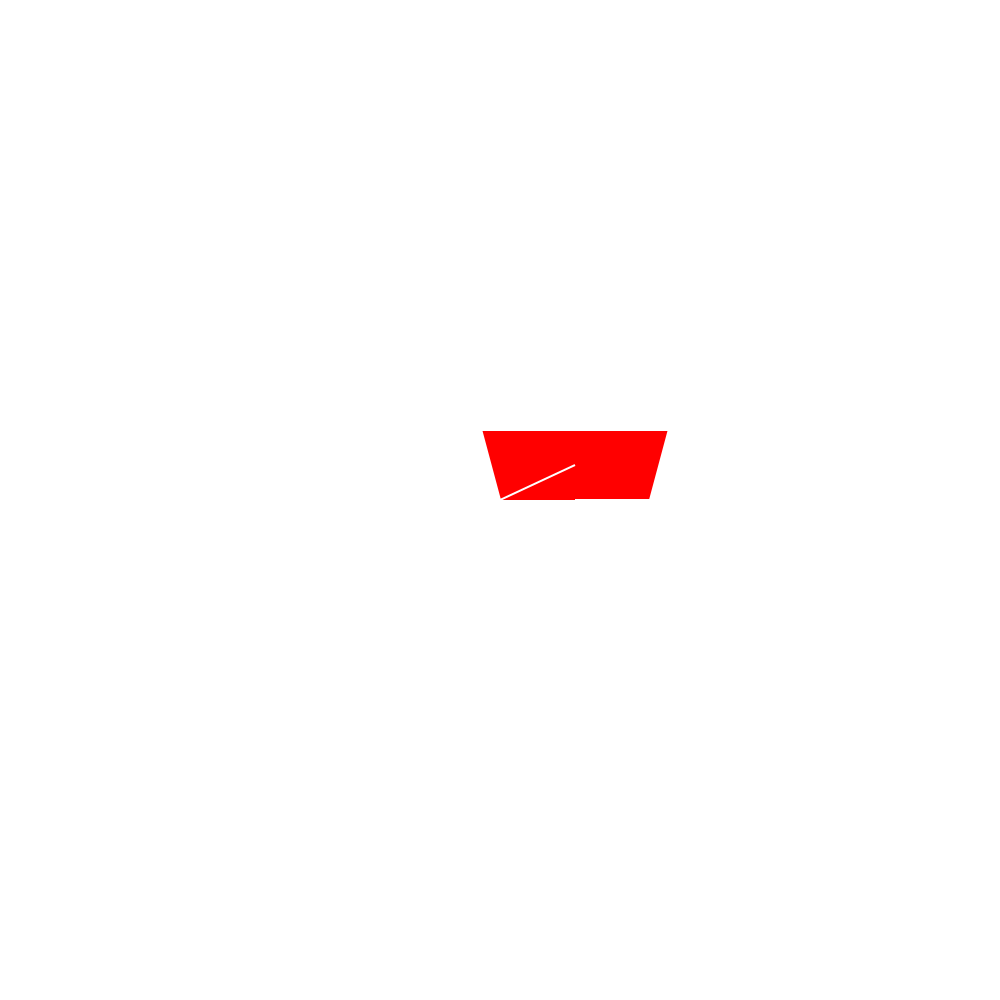

In [10]:
@disp
def draw(context, width, height):
    positions = []
    for position in ["center", "bot_left", "mid_left", "top_left", "mid_top", "top_right", "mid_right", "bot_right", "mid_bot"]:
        trap = Shapes.My_Trapezoid(
            ref_pt=position, ref_pt_x=500, ref_pt_y=500, bot_width=150, angle=-15, height=70
        )

        positions.append([trap._matrix.loc[dict(dim="x", pt="pt1")].values, trap._matrix.loc[dict(dim="y", pt="pt1")].values])
   
    trap = Shapes.My_Trapezoid(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, bot_width=150, angle=-15, height=70
        )
    trap.draw_fill(context, *colors.red)
    context.set_source_rgb(*colors.white)
    context.move_to(positions[0][0], positions[0][1])
    context.line_to(positions[1][0], positions[1][1])
    context.line_to(positions[2][0], positions[2][1])
    context.line_to(positions[3][0], positions[3][1])
    context.line_to(positions[4][0], positions[4][1])
    context.line_to(positions[5][0], positions[5][1])
    context.line_to(positions[6][0], positions[6][1])
    context.line_to(positions[7][0], positions[7][1])
    context.line_to(positions[8][0], positions[8][1])

    context.stroke()

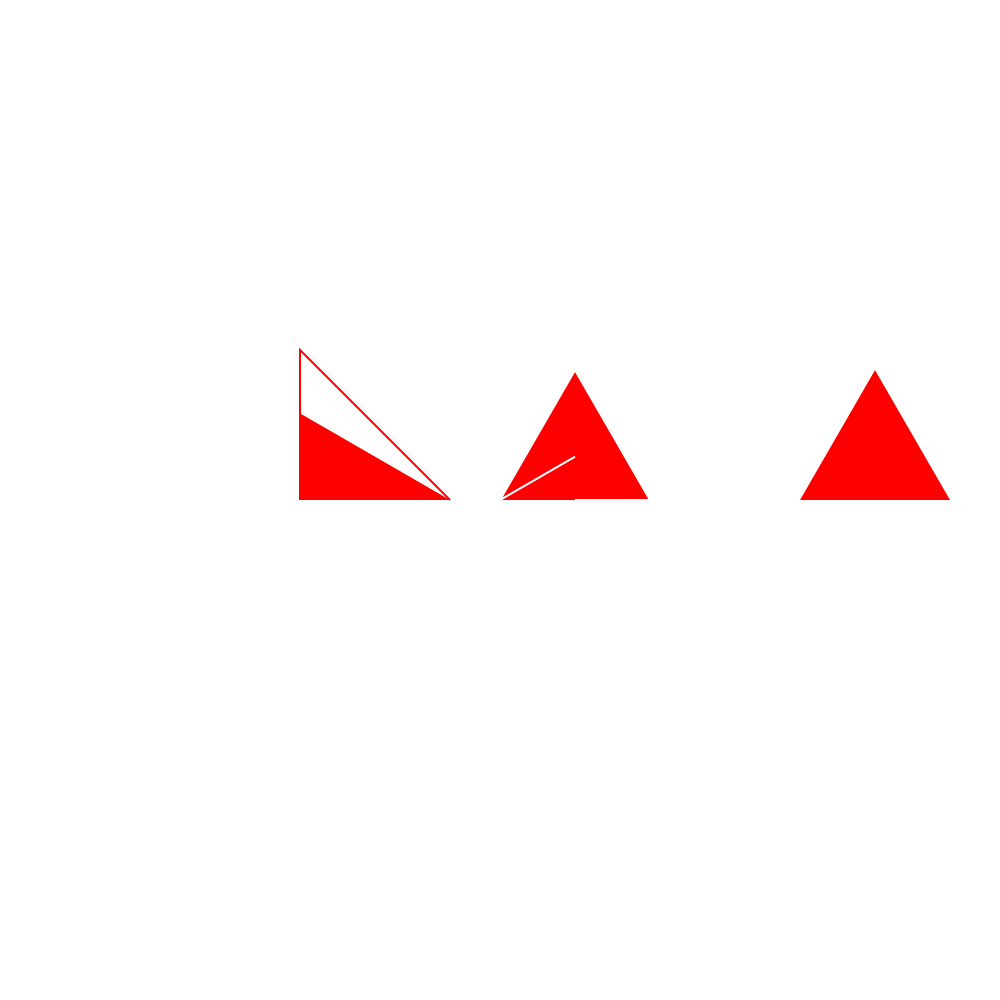

In [11]:
@disp
def draw(context, width, height):
    positions = []
    for position in ["center", "bot_left", "mid_left", "mid_top", "mid_right", "bot_right", "mid_bot"]:
        tri1 = Shapes.My_IsoscelesTriangle(
            ref_pt=position, ref_pt_x=500, ref_pt_y=500, width=150, angle=60
        )

        positions.append([tri1._matrix.loc[dict(dim="x", pt="pt1")].values, tri1._matrix.loc[dict(dim="y", pt="pt1")].values]) 

    tri1 = Shapes.My_IsoscelesTriangle(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150, angle=60
        )
    tri1.draw_fill(context, *colors.red)
    tri2 = Shapes.My_EquilateralTriangle(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150
        )
    tri2.translate(300, 0)
    tri2.draw_fill(context, *colors.red)
    tri3 = Shapes.My_RightTriangle(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150, angle=45
        )
    tri3.translate(-200, 0)
    tri3.draw_stroke(context, *colors.red)
    tri3 = Shapes.My_RightTriangle(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150, angle=30
        )
    tri3.translate(-200, 0)
    tri3.draw_fill(context, *colors.red)
    context.set_source_rgb(*colors.white)
    context.move_to(positions[0][0], positions[0][1])
    context.line_to(positions[1][0], positions[1][1])
    context.line_to(positions[2][0], positions[2][1])
    context.line_to(positions[3][0], positions[3][1])
    context.line_to(positions[4][0], positions[4][1])
    context.line_to(positions[5][0], positions[5][1])
    context.line_to(positions[6][0], positions[6][1])

    context.stroke()

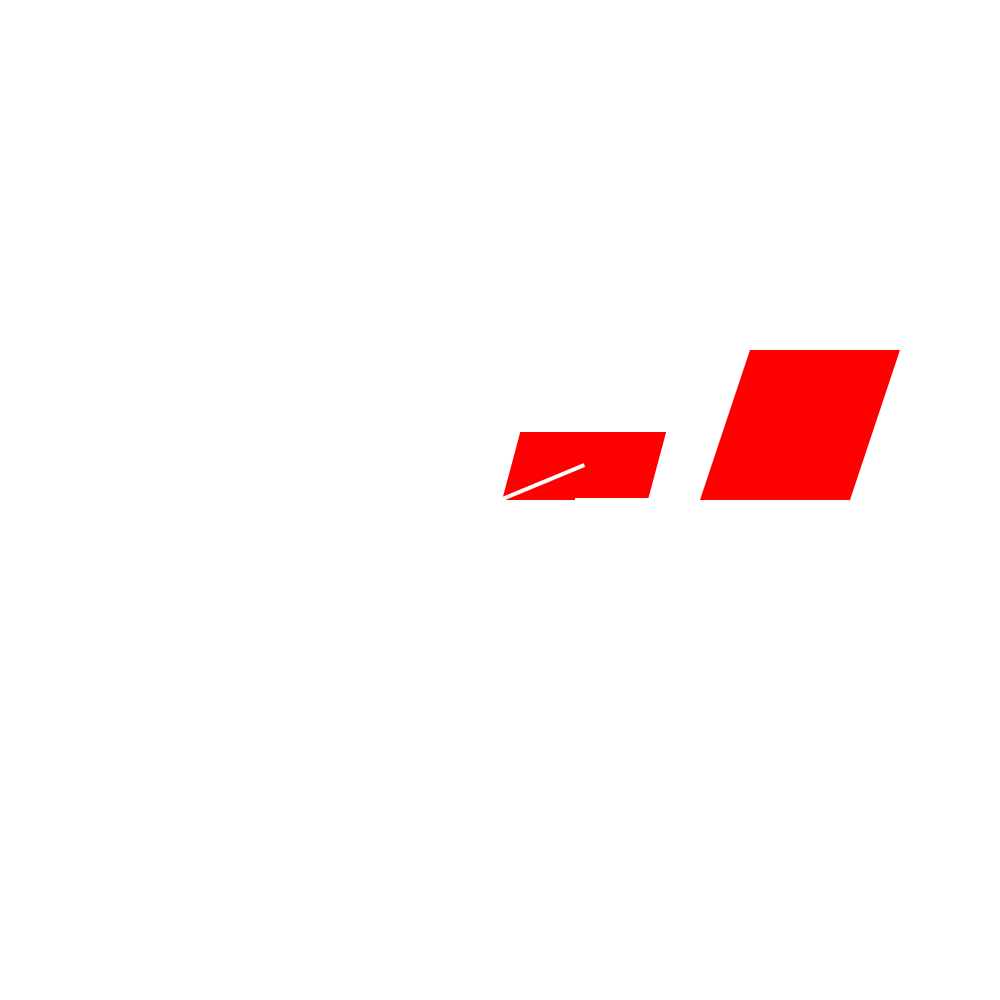

In [12]:
@disp
def draw(context, width, height):
    positions = []
    for position in ["center", "bot_left", "mid_left", "top_left", "mid_top", "top_right", "mid_right", "bot_right", "mid_bot"]:
        par = Shapes.My_Parallelogram(
            ref_pt=position, ref_pt_x=500, ref_pt_y=500, width=150, angle=15, height=70
        )

        positions.append([par._matrix.loc[dict(dim="x", pt="pt1")].values, par._matrix.loc[dict(dim="y", pt="pt1")].values])

    par = Shapes.My_Parallelogram(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150, angle=15, height=70
        )
    context.set_line_width(4)
    par.draw_fill(context, *colors.red)
    context.set_source_rgb(*colors.white)
    par2 = Shapes.My_Parallelogram(
            ref_pt="bot_left", ref_pt_x=500, ref_pt_y=500, width=150, height=150, offset=50
        )
    par2.translate(200, 0)
    par2.draw_fill(context, *colors.red)
    context.set_source_rgb(*colors.white)
    context.move_to(positions[0][0], positions[0][1])
    context.line_to(positions[1][0], positions[1][1])
    context.line_to(positions[2][0], positions[2][1])
    context.line_to(positions[3][0], positions[3][1])
    context.line_to(positions[4][0], positions[4][1])
    context.line_to(positions[5][0], positions[5][1])
    context.line_to(positions[6][0], positions[6][1])
    context.line_to(positions[7][0], positions[7][1])
    context.line_to(positions[8][0], positions[8][1])

    context.stroke()